In [423]:
%matplotlib inline

In [424]:
from IPython.display import Image

# An Introduction to K-Means Algorithm

K-means clustering is a method for finding clusters and cluster centers in a unlabeled dataset. One chooses the desired number of cluster centers, say $k$, and the K-Means procedure iteratively moves the centers to minimize the total within-cluster variance. Given an initial set of centers, the K-Means algorithm alternates the two steps:
* for each center we identify the subset of data points that is closer to it than any other cluster
* the mean of each cluster are computed, which becomes the center of the cluster

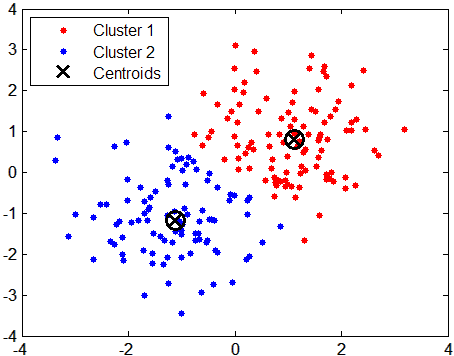

In [425]:
Image("k_means1.png")

As an example below, take a look at the K-Means algorithm performance at clustering different types of Iris flowers (setosa, veriscolor, virginica) in the famous "Iris Dataset." "Features" that might help discriminate between different species of flowers include sepal length, sepal width, petal length, etc... Plotting each sample in a 3-dimensional space might lead us to believe that we would see 3 clusters that are (approximately) linearly separable.

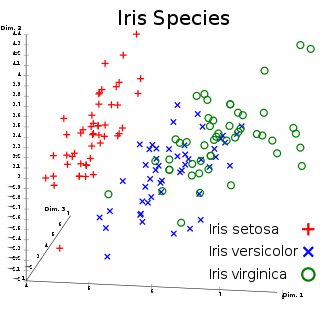

In [426]:
Image("k_means2.png")


Where else can we use K-Means? In genomics, it is common to use mRNA expression data to find clusters of similarly expressed genes to help understand their function in various tissue types. In this case, the features are the "genes," and we believe that there exists a general expression pattern that defines each tissue type in an $N$-dimensional space.

First, consider a gene experession dataset $X$ with only 3 genes and 200 samples, and there are $k$ unknown tissue types. We believe that if we plotted each sample in a 3-dimensional space, we would see (approximately) $k$ distinct clusters.


For a sample $x^{(i)}$, where $i$ represents the index of the $i^{th}$ sample in your dataset $X$, we can view each sample as a $1 \times 3$ vector, i.e., $x^{(i)} = (x^{(i)}_1, x^{(i)}_2, x^{(i)}_3)$. Here, we use the superscript to denote index of the sample, and the subscript to denote the index of the features.

With the following notation, we can define the K-Means algorithm is defined as follows:

$\textbf{1. Initialization}$: Set the initial "$k$ means" to $k$ randomly selected data points in your dataset, which we can call $m_1 \dots m_k$. These points will act as the initial means.  If $j$ is the index of a randomly selected data point in $X$, then:
$\forall r \in 1\dots k: m^{(r)} = \Big(m^{(r)}_1 = x^{(j)}_1, m^{(r)}_2 = x^{(j)}_2, m^{(r)}_3 = x^{(j)}_3\Big) = x^{(j)}$

$\textbf{2. Assignment}$: For data point $x^{(i)}$ in $X$, we assignment it to the nearest mean $m^{(r)}$ under the euclidean distance heuristic (L2-norm) that seeks to minimize: $\sqrt{ (m^{(r)}_1-x^{(i)}_1)^2 + (m^{(r)}_2-x^{(i)}_2)^2 + (m^{(r)}_3-x^{(i)}_3)^2   } \forall i$. In Python, we can manage the closest data points of each mean with a list. Formally, we can do that with the indicator function $r$:
$r^{(i)} =$ $
\begin{cases} 
    1 & \text{if } x^{(i)} \text{ is closest to } m^{(r)} \\
    0 & \text{else} 
\end{cases}
$

$\textbf{3. Update}$: For each of the $k$ means, update the center to be the mean of the data points that are assigned to it.

$\forall r, m^{(r)} = \Bigg(m^{(r)}_1 = \dfrac{\sum_i^N r^{(i)}x^{(i)}_1}{\sum_i^N r^{(i)}}, m^{(r)}_2 = \dfrac{\sum_i^N r^{(i)}x^{(i)}_2}{\sum_i^N r^{(i)}}, m^{(r)}_3 = \dfrac{\sum_i^N r^{(i)}x^{(i)}_3}{\sum_i^N r^{(i)}}\Bigg)$

$\textbf{4. Convergence Test}$: Repeat the assignment and update steps until the center converge and do not change (within some tolerance), or the algorithm reaches its maximum iteration.

# Implementation of K-Means

In [427]:
import numpy as np
import pandas as pd
import random, math
X = np.loadtxt("clusters.dat")

col_header = ["Gene 1", "Gene 2", "Gene 3"]
row_header = ["Sample "+str(i) for i in range(X.shape[0])]
pandas.DataFrame(X, index=row_header, columns = col_header)

,Gene 1,Gene 2,Gene 3
Sample 0,0.654202,1.086765,0.110613
Sample 1,0.099148,0.068597,0.041554
Sample 2,0.056352,0.005871,0.029134
Sample 3,0.692180,0.902017,0.276470
Sample 4,0.064179,0.324430,0.783668
Sample 5,0.271119,-0.047444,0.012411
Sample 6,0.052349,0.015719,0.112408
Sample 7,0.094049,0.015220,0.130178
Sample 8,0.153741,0.039094,-0.135616
Sample 9,0.662872,0.973899,0.281920


$\textbf{Q1.}$ Implement the initialization step of K-Means with $k$ = 3. Intead of initializing $k$ random centers, select the first $k$ data points in $X$ as your centers.

In [432]:
# Problem
def Initialization(X, k):
    """
        X: N x d Numpy array, where N is the number of samples, and d is number of features
        k: desired number of clusters
        
        Return: k x d Numpy array, in which the initial centers are the first k data points
    """
    # INSERT CODE HERE
    return

# Solution
def Initialization(X, k):
    """
        X: N x d Numpy array, where N is the number of samples, and d is number of features
        k: desired number of clusters
        
        Return: k x d Numpy array, in which the initial centers are the first k data points
    """
    return X[:k,:]
    
init_centers = Initialization(X, k=3)
init_centers

array([[ 0.6542018 ,  1.0867654 ,  0.1106132 ],
       [ 0.09914755,  0.06859668,  0.04155401],
       [ 0.05635164,  0.00587115,  0.02913384]])

$\textbf{Q2.1}$ Implement a heuristic for calculating the euclidean distance between two points in an $N$-dimensional space. (Look familiar?)

In [433]:
# Problem
def L2Distance(x, y):
    """
    x: 1 x d Numpy array
    y: 1 x d Numpy array
    
    Return: floating integer, which is the euclidean distance between x and y
    """
    # INSERT CODE HERE
    return

# Solution
def L2Distance(x, y):
    """
    x: 1 x d Numpy array
    y: 1 x d Numpy array
    
    Return: floating integer which is the euclidean distance between x and y
    """
    return math.sqrt(sum((x[i]-y[i])**2 for i in range(len(y))))
    return np.linalg.norm(x - y, axis=0) # optimal solution

solution_q21 = 13
L2Distance(np.array([0,0,0]), np.array([3,4,12])) == solution_q21

True

$\textbf{Q2.2}$ Implement the assignment step of K-Means. Given a set of centers, label each point to its closest center. For a point $x^{(i)}$, A label "0" for $x^{(i)}$ would mean that $x^{(i)}$ belongs to $m_0$

In [434]:
# Problem
def Assignment(X, curr_centers):
    """
        X: N x d Numpy array
        curr_centers: k x d Numpy array representing the current centers
        
        Return labels: 1 x N Numpy array containing the label of each point X
    """
    labels = []
    for x_i in X:
        # INSERT CODE HERE
        labels.append("LABEL OF x_i. INSERT MORE CODE HERE")
    return np.array(labels)

# Solution
def Assignment(X, curr_centers):
    """
        X: N x d Numpy array
        curr_centers: k x d Numpy array representing the current centers
        
        Return labels: 1 x N Numpy array containing the label of each point X
    """
    labels = []
    for x_i in X:
        distance_list = [L2Distance(x_i, mean) for mean in curr_centers]
        labels.append(distance_list.index(min(distance_list)))
    
    return np.array(labels)
    return np.argmin([np.linalg.norm(X - m_r, axis=1) for m_r in curr_centers], axis=0) # optimal

solution_q22 = np.array([0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, \
       0, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, \
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, \
       0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, \
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, \
       2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, \
       0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, \
       1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, \
       1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1])
print Assignment(X, init_centers)
np.array_equal(Assignment(X, init_centers), solution_q22)

[0 1 2 0 1 1 2 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 2 2 2 0 1 2 1 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 2 1 1 1 0 1 0 1 1 2 1
 0 1 0 2 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 2 2 1 1 0 1 1 0 0 1
 1 1 0 0 2 1 1 0 1 1 0 2 0 0 0 1 0 1 1 2 0 0 2 0 0 2 0 0 1 0 0 2 0 0 1 0 1
 2 1 1 0 1 1 1 0 0 1 2 0 0 1 2 0 0 1 2 2 2 0 0 2 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 2 0 0 0 0 1 0 0 2 0 1]


True

$\textbf{Q3.1}$ Implement the update step of K-Means.

In [435]:
# Problem
def Update(X, curr_centers, labels):
    """
        X: N x d Numpy array
        curr_centers: k x d Numpy array
        labels: 1 x N Numpy array containing the label of each point X
        
        
        Return: k x d Numpy array representing the updated centers
    """
    updated_centers = np.copy(curr_centers)
    
    for r, _ in enumerate(updated_centers):
        closest_pts = X[np.where(labels == r)[0],:]

        if (closest_pts.shape[0] == 0): 
            continue
        else:
            updated_centers[r] = None # INSERT CODE HERE

    return updated_centers

# Solution
def Update(X, curr_centers, labels):
    """
        X: N x d Numpy array
        curr_centers: k x d Numpy array
        labels: 1 x N Numpy array containing the label of each point X
        
        Return: k x d Numpy array representing the updated centers
    """
    updated_centers = np.copy(curr_centers)
    
    for r, _ in enumerate(updated_centers):
        closest_pts = X[np.where(labels == r)[0],:]

        if (closest_pts.shape[0] == 0): 
            continue
        else:
            updated_centers[r] = np.array([np.mean(closest_pts[:, j]) \
                                   for j in range(closest_pts.shape[1])])

    return updated_centers
    return np.array([np.mean(X[labels == r], axis=0) for r in range(k)]) # optimal

solution_q3 = np.array([[ 0.09294083,  0.18055846,  0.34174784], \
                        [ 0.93081058,  0.87488542,  0.06339762], \
                        [ 0.69547611,  0.97524486,  0.24464008]])
print Update(X, init_centers, labels)
np.all(np.isclose(Update(X, init_centers, labels), solution_q3, 1e-8))

[[ 0.8083406   0.92711329  0.15771767]
 [ 0.07948555  0.36456536  0.72595236]
 [ 0.10443898  0.0233162   0.01342761]]


False

$\textbf{Q4}$ Write the convergence test step of K-Means. Given an old set of centers and an updated set of centers, write a function that tests whether or not each center is within a certain distance of each other (tolerance), or stops the algorithm if it reaches a maximum iteration. Hint: We wrote a function earlier that measures the euclidean distance between two points!

In [436]:
# Problem
def HasConverged(old_centers, new_centers, tol=1e-8):
    """
        old_centers: k x d Numpy array containing the centers @ iteration i
        new_centers: k x d Numpy array containing the centers @ iteration i+1
        tol: accepted tolerance 
        
        Return: boolean value, in which True means it has converged, and false means it hasn't
    """
    k = old_centers.shape[0]
    
    return True

# Solution
def HasConverged(old_centers, new_centers, tol=1e-10):
    """
        old_centers: k x d Numpy array containing the centers @ iteration i
        new_centers: k x d Numpy array containing the centers @ iteration i+1
        tol: accepted tolerance 
        
        Return: boolean value, in which True means it has converged, and false means it hasn't
    """
    k = old_centers.shape[0]
    
    for r in range(k):
        m_r_old = old_centers[r,:]
        m_r_new = new_centers[r,:]

        if L2Distance(m_r_old, m_r_new) > tol:
            return False
        
    return True
HasConverged(init_centers, Update(X, init_centers, labels))

False

$\textbf{Q5}$ We now have everything we need to write the Initialization, Assignment, Update, and Convergence Test of K-Means.

In [440]:
# Problem
def K_Means(X, k, itr_max = 10):
    """
        X: N x d Numpy array, where N is the number of samples, and d is number of features
        k: desired number of clusters
        itr_max: maximum number of iterations of K-Means
        
        Return: Tuple containing final cluster centers and boolean values
    """
    init_centers = None # Insert Code Here!
    curr_centers = init_centers

    for itr in range(itr_max):
        continue 
        # Insert More Code Here!
    return

# Solution
def K_Means(X, k, itr_max = 10):
    """
        X: N x d Numpy array, where N is the number of samples, and d is number of features
        k: desired number of clusters
        itr_max: maximum number of iterations of K-Means
        
        Return: Tuple containing final cluster centers and boolean values
    """
    init_centers = Initialization(X, k)
    curr_centers = init_centers
    
    for itr in range(itr_max):
        labels = Assignment(X, curr_centers)
        updated_centers = Update(X, curr_centers, labels)
        
        if HasConverged(curr_centers, updated_centers):
            return updated_centers, labels
        else:
            curr_centers = updated_centers

$\textbf{Q6}$ Once we have completed the K-Mean functions, we can begin clustering our data on a variety of different $k$s! Using some skeleton code below for making 3D scatter plots, experiment with different values of $k$ and report on the number of clusters you think the data can be separated into!

[[ 0.6542018   1.0867654   0.1106132 ]
 [ 0.09914755  0.06859668  0.04155401]]
[[ 0.6542018   1.0867654   0.1106132 ]
 [ 0.09914755  0.06859668  0.04155401]]
[[ 0.6542018   1.0867654   0.1106132 ]
 [ 0.09914755  0.06859668  0.04155401]
 [ 0.05635164  0.00587115  0.02913384]]


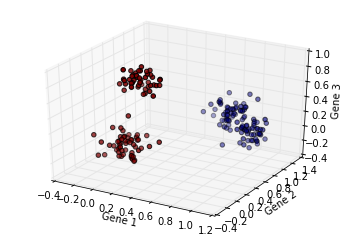

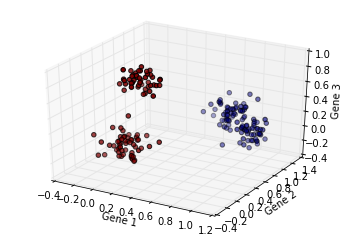

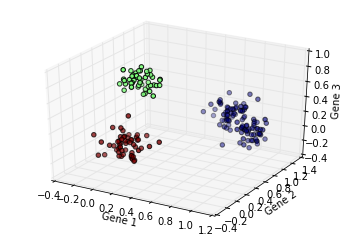

In [444]:
# Problem
_, labels_2 = K_Means(X, k = 2)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[:,0], X[:,1], X[:,2], c=labels_2, marker="o")
ax1.set_xlabel('Gene 1')
ax1.set_ylabel('Gene 2')
ax1.set_zlabel('Gene 3')

_, labels_15 = K_Means(X, k = 2)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X[:,0], X[:,1], X[:,2], c=labels_15, marker="o")
ax2.set_xlabel('Gene 1')
ax2.set_ylabel('Gene 2')
ax2.set_zlabel('Gene 3')


# Solution
# k = 3 is the best
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X[:,0], X[:,1], X[:,2], c=K_Means(X, k = 3)[1], marker="o")
ax3.set_xlabel('Gene 1')
ax3.set_ylabel('Gene 2')
ax3.set_zlabel('Gene 3')

plt.show()